# Bikeshare数据集

1、	任务描述
请在Capital Bikeshare （美国Washington, D.C.的一个共享单车公司）提供的自行车数据上进行回归分析。根据每天的天气信息，预测该天的单车共享骑行量。

原始数据集地址：http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
1)	文件说明
day.csv: 按天计的单车共享次数（作业只需使用该文件）
hour.csv: 按小时计的单车共享次数（无需理会）
readme：数据说明文件

2)	字段说明
Instant记录号
Dteday：日期
Season：季节（1=春天、2=夏天、3=秋天、4=冬天）
yr：年份，(0: 2011, 1:2012)
mnth：月份( 1 to 12)
hr：小时 (0 to 23)  （只在hour.csv有，作业忽略此字段）
holiday：是否是节假日
weekday：星期中的哪天，取值为0～6
workingday：是否工作日
1=工作日 （是否为工作日，1为工作日，0为非周末或节假日
weathersit：天气（1：晴天，多云 2：雾天，阴天 3：小雪，小雨 4：大雨，大雪，大雾）
temp：气温摄氏度
atemp：体感温度
hum：湿度
windspeed：风速
casual：非注册用户个数
registered：注册用户个数
cnt：给定日期（天）时间（每小时）总租车人数，响应变量y （cnt = casual + registered）

casual、registered和cnt三个特征均为要预测的y，作业里只需对cnt进行预测

## 1_EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dpath = './data/'

data = pd.read_csv(dpath + 'day.csv')
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
# 离散变量数据探索
categorical_features = ['season', 'mnth', 'weathersit', 'weekday']

for col in categorical_features:
    print('\n%s特征的不同取值和出现次数：' % col)
    print(data[col].value_counts())
    data[col].astype(object)


season特征的不同取值和出现次数：
3    188
2    184
1    181
4    178
Name: season, dtype: int64

mnth特征的不同取值和出现次数：
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64

weathersit特征的不同取值和出现次数：
1    463
2    247
3     21
Name: weathersit, dtype: int64

weekday特征的不同取值和出现次数：
6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64


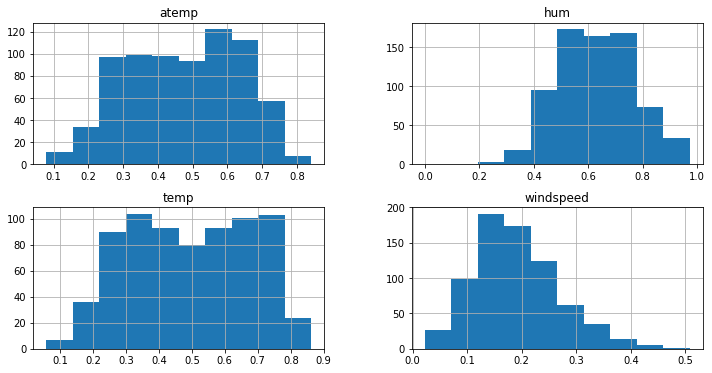

In [8]:
# 连续变量
numerical_features = ['temp','atemp','hum','windspeed']
data[numerical_features].hist(figsize=(12, 6));

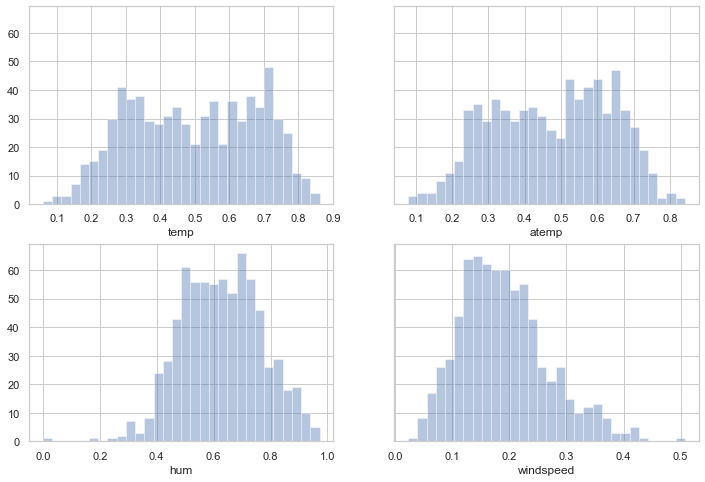

In [25]:
fig, axes = plt.subplots(2, 2, sharey=True, figsize=(12, 8))

sns.distplot(data['temp'], bins=30, kde=False, ax=axes[0,0])
sns.distplot(data['atemp'], bins=30, kde=False, ax=axes[0,1])
sns.distplot(data['hum'], bins=30, kde=False, ax=axes[1,0])
sns.distplot(data['windspeed'], bins=30, kde=False, ax=axes[1,1]);

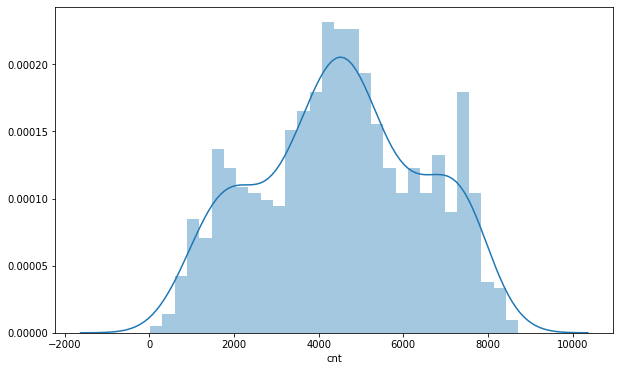

In [10]:
# 标签y
fig = plt.figure(figsize=(10, 6))
sns.distplot(data['cnt'], bins=30, kde=True)
plt.show()

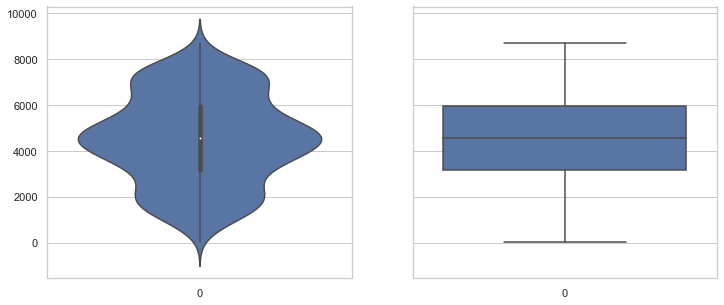

In [22]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))
sns.set(style="whitegrid")
sns.violinplot(data=data.cnt, ax=axes[0])
sns.boxplot(data=data.cnt, ax=axes[1])
plt.show()

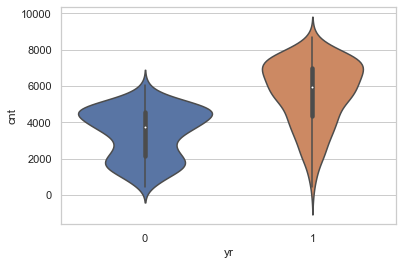

In [28]:
sns.violinplot(x='yr', y='cnt', data=data);

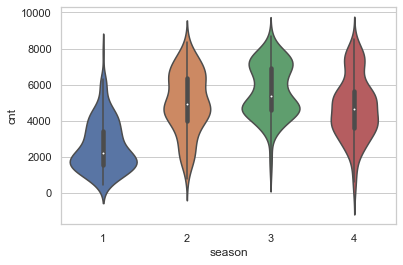

In [29]:
sns.violinplot(data=data[['season', 'cnt']], x="season", y="cnt");

[Text(0.5, 1.0, 'dayily distribution of counts')]

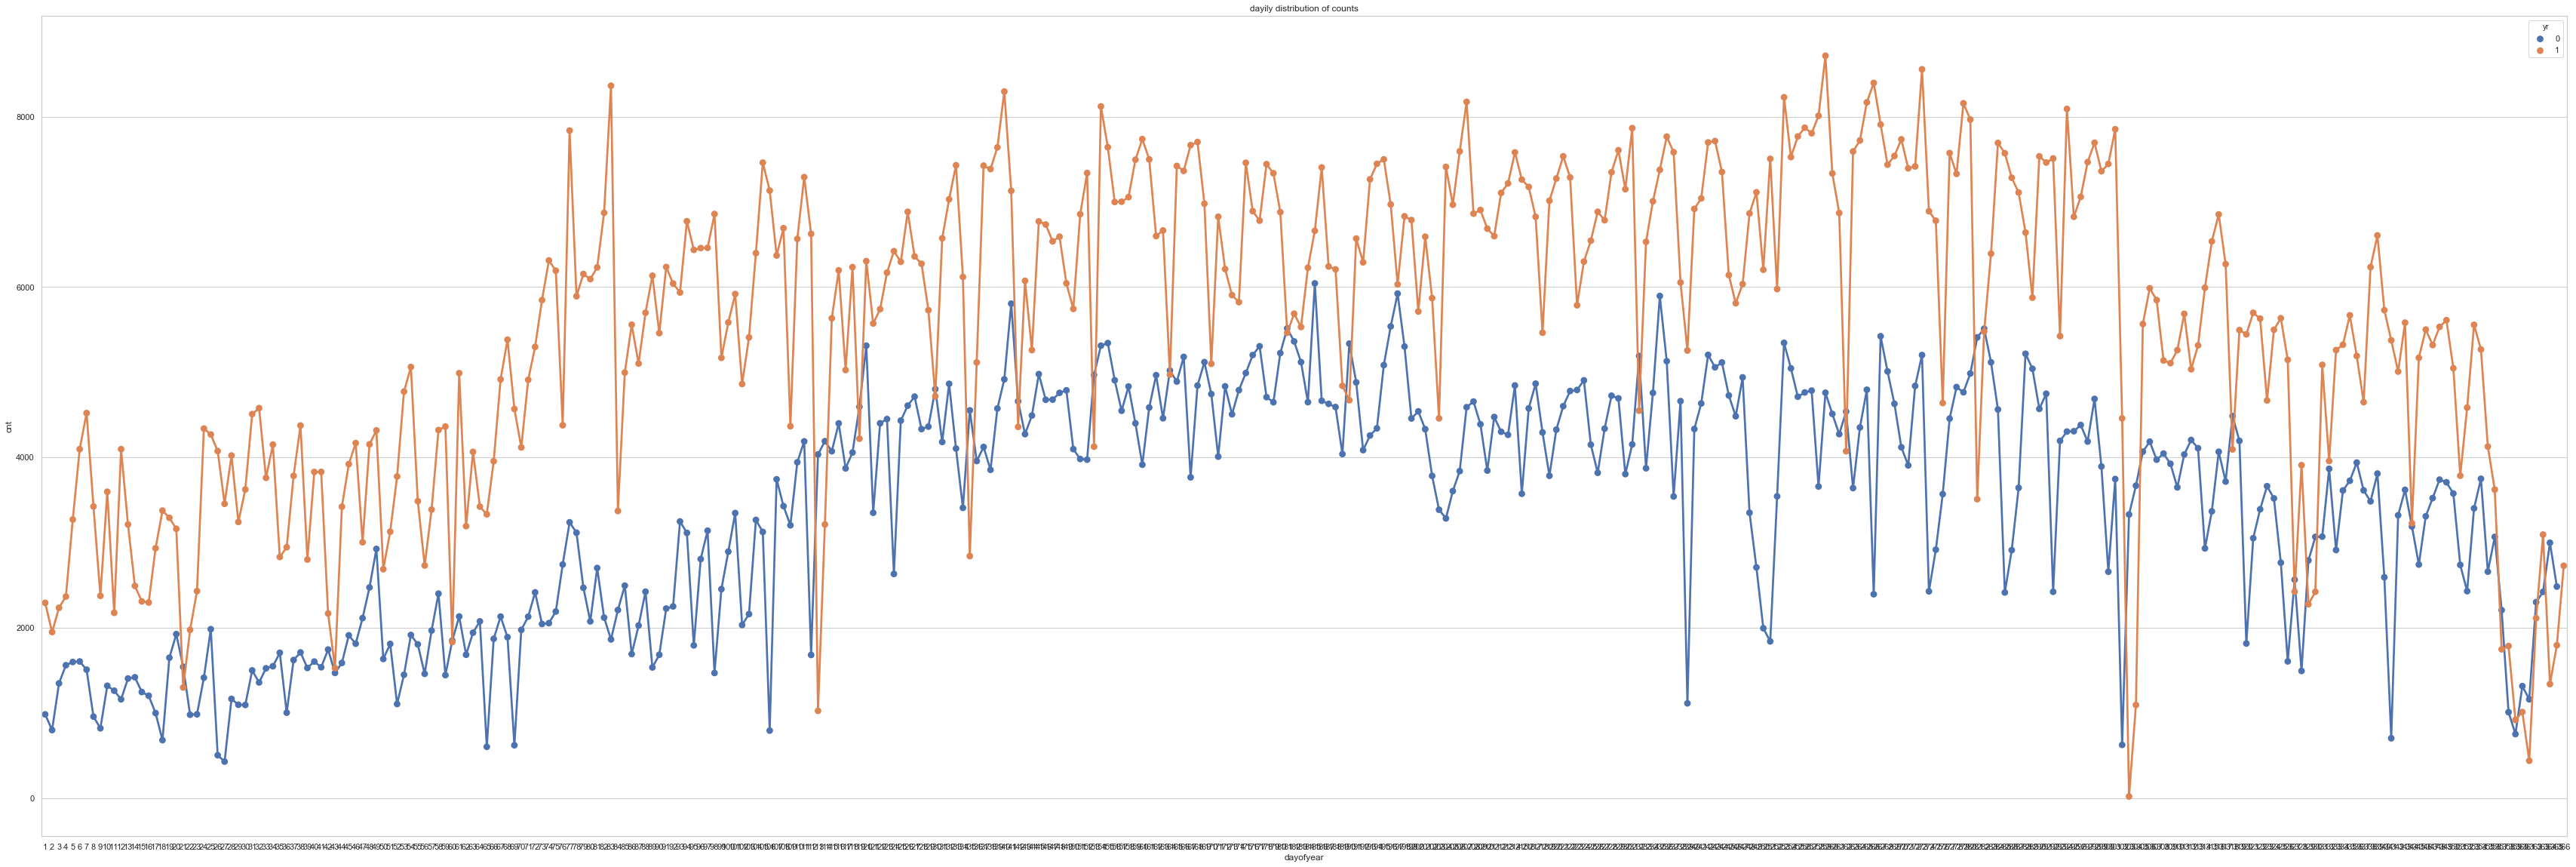

In [30]:
import datetime

data['date'] = pd.to_datetime(data['dteday'])
data['dayofyear'] = data["date"].dt.dayofyear  # 减今年的第几天

fig,ax = plt.subplots(figsize=(60,20))
sns.pointplot(data=data[['dayofyear',
                           'cnt',
                           'yr']],
             x='dayofyear',y='cnt',
             hue='yr',ax=ax)
ax.set(title="dayily distribution of counts")

In [31]:
corrMatt = data[["temp","atemp",
                  "hum","windspeed",
                  "casual","registered",
                  "cnt"]].corr()

corrMatt

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
cnt,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


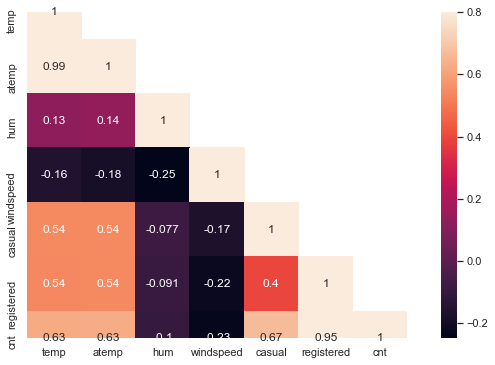

In [32]:
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig = plt.figure(figsize=(12, 6))
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True);

## 2_FE

In [33]:
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date,dayofyear
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011-01-01,1
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011-01-02,2
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011-01-03,3
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011-01-04,4
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011-01-05,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,2012-12-27,362
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,2012-12-28,363
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,2012-12-29,364
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,2012-12-30,365


In [34]:
categorical_features = ['season','mnth','weathersit','weekday']
numerical_features = ['temp','atemp','hum','windspeed']

In [35]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
temp = mms.fit_transform(data[numerical_features])
temp

array([[0.3551696 , 0.37351738, 0.82862005, 0.2846062 ],
       [0.37923205, 0.36054067, 0.71577069, 0.46621455],
       [0.1709998 , 0.14483011, 0.44963805, 0.4657404 ],
       ...,
       [0.24198597, 0.2143932 , 0.77420771, 0.21026043],
       [0.2451011 , 0.20034801, 0.49700051, 0.67693615],
       [0.19525913, 0.18956733, 0.59383033, 0.27306151]])

In [36]:
col_num = pd.DataFrame(data=temp, columns=numerical_features, index=data.index)
col_num.head()

,temp,atemp,hum,windspeed
0,0.355170,0.373517,0.828620,0.284606
1,0.379232,0.360541,0.715771,0.466215
2,0.171000,0.144830,0.449638,0.465740
3,0.175530,0.174649,0.607131,0.284297
4,0.209120,0.197158,0.449313,0.339143


In [40]:
col_cat = data[categorical_features].astype('object')
col_cat.head()

,season,mnth,weathersit,weekday
0,1,1,2,6
1,1,1,2,0
2,1,1,1,1
3,1,1,1,2
4,1,1,1,3


In [41]:
col_cat = pd.get_dummies(col_cat)
col_cat.head()

,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,...,weathersit_1,weathersit_2,weathersit_3,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [42]:
fe_day = pd.concat([data['instant'], col_cat, col_num, data['holiday'], data['workingday'], data['yr'], data['cnt']], 
                  axis=1, ignore_index=False)
fe_day.head()

,instant,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,...,weekday_5,weekday_6,temp,atemp,hum,windspeed,holiday,workingday,yr,cnt
0,1,1,0,0,0,1,0,0,0,0,...,0,1,0.355170,0.373517,0.828620,0.284606,0,0,0,985
1,2,1,0,0,0,1,0,0,0,0,...,0,0,0.379232,0.360541,0.715771,0.466215,0,0,0,801
2,3,1,0,0,0,1,0,0,0,0,...,0,0,0.171000,0.144830,0.449638,0.465740,0,1,0,1349
3,4,1,0,0,0,1,0,0,0,0,...,0,0,0.175530,0.174649,0.607131,0.284297,0,1,0,1562
4,5,1,0,0,0,1,0,0,0,0,...,0,0,0.209120,0.197158,0.449313,0.339143,0,1,0,1600


In [43]:
fe_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 35 columns):
instant         731 non-null int64
season_1        731 non-null uint8
season_2        731 non-null uint8
season_3        731 non-null uint8
season_4        731 non-null uint8
mnth_1          731 non-null uint8
mnth_2          731 non-null uint8
mnth_3          731 non-null uint8
mnth_4          731 non-null uint8
mnth_5          731 non-null uint8
mnth_6          731 non-null uint8
mnth_7          731 non-null uint8
mnth_8          731 non-null uint8
mnth_9          731 non-null uint8
mnth_10         731 non-null uint8
mnth_11         731 non-null uint8
mnth_12         731 non-null uint8
weathersit_1    731 non-null uint8
weathersit_2    731 non-null uint8
weathersit_3    731 non-null uint8
weekday_0       731 non-null uint8
weekday_1       731 non-null uint8
weekday_2       731 non-null uint8
weekday_3       731 non-null uint8
weekday_4       731 non-null uint8
weekday_5       731 

In [44]:
fe_day.to_csv(dpath + 'FE_day.csv', index=False)